<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 · Tipología y ciclo de vida de los datos · PRA2</p>
<p style="margin: 0; text-align:right;">2020-2 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRA 2: Limpieza y análisis

En esta práctica se elabora un caso práctico orientado a aprender a identificar los datos relevantes para un proyecto analítico y usar las herramientas de integración, limpieza, validación y análisis de las mismas. Para hacer esta práctica tendréis que trabajar en grupos de 2 personas.

Tendréis que entregar un solo archivo con el enlace Github (https://github.com) donde haya las soluciones incluyendo los nombres de los componentes del equipo. Podéis utilizar la Wiki de Github para describir vuestro equipo y los diferentes archivos que corresponden a vuestra entrega. Cada miembro del equipo tendrá que contribuir con su usuario Github. Podeís utilizar estos ejemplos como guía:

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Trabajo realizado por:</strong> 
    
    - Lissette Muñoz Guillen
    - César Irnán Sillero

</div>

In [ ]:
#Carga de librerias y paquetes a utilizarse

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Visualización
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Descripción del set de datos

<div style="background-color: #F4F6F6;">
    <hr>
Se ha seleccionado un conjunto de datos que contiene variables numéricas que miden la calidad del vino con un puntaje entre 0 y 10.
 
    1 - fixed_acidity: Cantidad de acidez fija, acidez total menos los ácidos volátiles (varibale numérica)
    2 - volatile acidity: Cantidad de acidez volatil (variable numérica)
    3 - citric acid: Cantidad de ácido cítrico (variable numérica)
    4 - residual sugar: Cantidad de azucar residual (variable numérica)
    5 - chlorides: Cantidad de cloruros de sodio (variable numérica)
    6 - free sulfur dioxide: Cantidad de díoxido de azufre libre (variable numérica)
    7 - total sulfur dioxide: Cantidad de díoxido de azufre total (variable numérica)
    8 - density: Densidad del vino (variable numérica)
    9 - pH: Medida de la acidez del vino (variable numérica)
    10 - sulphates: Cantidad de sulfato de potasio (variable numérica)
    11 - alcohol: Porcentaje por volumen (variable numérica)
   
    
La variable "target" 
    
    12 - quality: Puntuación entre 0 y 10
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Objetivos:</strong> 
</div>

<div style="background-color: #F4F6F6;">
 
    
Los objetivos concretos de esta práctica son:
    
    - Aprender a aplicar los conocimientos adquiridos y su capacidad de resolución de problemas en entornos nuevos o poco 
      conocidos dentro de contextos más amplios o multidisciplinares.
    - Saber identificar los datos relevantes y los tratamientos necesarios (integración, limpieza y validación) para llevar 
      a cabo un proyecto analítico.
    - Aprender a analizar los datos adecuadamente para abordar la información contenida en los datos.
    - Identificar la mejor representación de los resultados para aportar conclusiones sobre el problema planteado en el 
      proceso analítico.
    - Actuar con los principios éticos y legales relacionados con la manipulación de datos en función del ámbito de  
      aplicación.
    - Desarrollar las habilidades de aprendizaje que les permitan continuar estudiando de un modo que tendrá que ser en 
      gran medida autodirigido o autónomo.
    - Desarrollar la capacidad de búsqueda, gestión y uso de información y recursos en el ámbito de la ciencia de datos.
    
</div>

# 2. Integración y selección de los datos de interés a analizar.

<hr>
<div style="background-color: #F4F6F6;">
Con la carga de los datos, tenemos un set con 12 variables que proporcionan información de los componentes de una muestra de vinos tintos y una variable objetivo llamada calidad, que servirá como etiqueta para aprendizajes supervisados.

Inicialmente exploraremos los datos
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Carga de los datos:</strong> 
</div>

In [ ]:
wine = pd.read_csv("winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<div style="background-color: #F4F6F6;">
Realizaremos las operaciones básicas de estadistica descriptiva para todas las variables.
</div>

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 3. Limpieza de datos.

<hr>
<div style="background-color: #F4F6F6;">
Inicialmente exploraremos y haremos una limpieza de todas las variables.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Tratamiento de datos con ceros o elementos vacios</strong> 
</div>

<div style="background-color: #F4F6F6;">
Es común encontrar en los conjuntos de datos valores con elementos vacios o valores ceros que no son parte de los datos normales. Este hecho se puede dar por varias razones: porque estos datos no existen, no se registraron correctamente o un error de computo, es importante analizar estos datos ya que podrían causar errores en nuestros análisis.

Este tipo de datos pueden tratarse de las siguientes formas:

    - Eliminar las variables con un porcentaje alto de valores vacíos
    - Eliminar las filas con variables no disponibles
    - Imputar los datos o llenarlos con un valor por defecto
    
Entonces buscaremos los valores nulos en nuestro conjunto de datos con la función isnull().
</div>

In [ ]:
wine_check=wine.isnull()
print(wine_check)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0             False             False        False  ...      False    False    False
1             False             False        False  ...      False    False    False
2             False             False        False  ...      False    False    False
3             False             False        False  ...      False    False    False
4             False             False        False  ...      False    False    False
...             ...               ...          ...  ...        ...      ...      ...
1594          False             False        False  ...      False    False    False
1595          False             False        False  ...      False    False    False
1596          False             False        False  ...      False    False    False
1597          False             False        False  ...      False    False    False
1598          False             False        False  ...      Fals

In [ ]:
wine.isnull().values.any()

False

<div style="background-color: #F4F6F6;">
Podemos observar que nuestro conjunto de datos no tiene valores nulos. La función anterior nos devolviera TRUE si existiera algún NaN en el DataFrame.
    
En el caso de existir este tipo de valores en nuestros datos los tratariamos  dependiendo de la variable, podríamos reemplazar los valores nulos por la media aritmetica del resto del dataset, o simplemente eliminando esa muestra completamente
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Identificación y tratamiento de valores extremos</strong> 
</div>

<div style="background-color: #F4F6F6;">
Los valores extremos o tambien conocidos por su término en ingles "outliers", decimos que son los valores que se escapan al rango en donde se 
concentran la mayoría de muestras. Es necesario detectar esos valores, ya que pueden afectar considerablemente a los resultados que pueda
obtener el modelo, por ejemplo, para una regresión puede causar un efecto negativo en las predicciones.

Aún con estas consideraciones, los valores extremos pueden significar:

    1. Un error: Si existen valores fuera de la realidad como por ejemplo en un grupo de edades de personas, tener un
       registro con 170 años, lo que nos indicaría que es un error de carga de datos. 
    
    2. Limites: En otros casos, podemos tener valores que se escapan del “grupo medio”, pero queremos mantener el dato
       modificado, para que no perjudique modelo.
    
    3. Punto de Interés: Datos “anómalos” que pueden mantenerse o eliminarse de nuestros datos dependiendo cual sea el
       objetivo. Este no representa un error, puede ser un indicador de falta de datos.
   
Para identificar estos outliers en nuestro set de datos, vamos a representar cada una de las variables con un diagrama de
de caja con la función sns.boxplot, además, en la parte superior de cada gráfica mostraremos los cuartiles superior e inferior, así como la media de cada una de las variables.

De esta manera analizaremos cada variable y se dará el respectivo tratamiento a los valores extremos.

</div>

Cuartil inferior: 7.1  Cuartil superior: 9.2  Media: 8.319637273295838


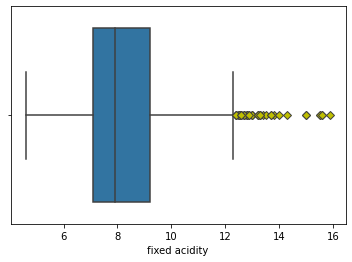

In [ ]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["fixed acidity"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["fixed acidity"], 0.75))
iqrI =(np.quantile(wine["fixed acidity"], 0.25))
m=wine["fixed acidity"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
De acuerdo a esta gráfica, tenemos muchos valores atípicos, que estan en el rango entre 12 y 16. Los valores de acidez fija pueden ser muy variantes en el vino por lo que en este caso dejaremos estos valores en nuestro conjunto de datos para ser parte del análisis.
</div>

Cuartil inferior: 0.39  Cuartil superior: 0.64  Media: 0.5278205128205131


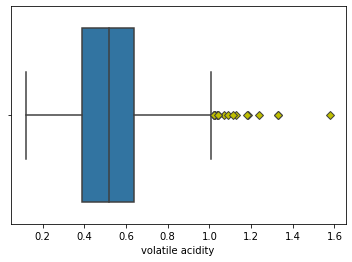

In [ ]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["volatile acidity"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["volatile acidity"], 0.75))
iqrI =(np.quantile(wine["volatile acidity"], 0.25))
m=wine["volatile acidity"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Para la variable 'volatile acidity' se tiene varios valores atípicos en un rango de 1 y 1.4, quedando un solo valor cerca de 1.6. En el caso de la acidez volatil del vino, de acuerdo a (www.catadelvino.com) "La calidad de un vino es mayor cuanto menor es su acidez volátil", lo que podríamos considerar que este único valor atípico de 1.6 podría interferir en nuestro analisis, considerando los valores medios y cuartiles. 
 <hr>
Procedemos a eliminar este valor atípico para que no afecte nuestro análisis posterior.
</div>

In [ ]:
ma=wine["volatile acidity"].max()
print ("Valor atípico a eliminarse:", ma)

#Eliminamos de nuestro conjunto de datos
wine = wine.drop(wine[wine['volatile acidity']==ma].index)

Valor atípico a eliminarse: 1.58


Cuartil inferior: 0.09  Cuartil superior: 0.42  Media: 0.2711451814768449


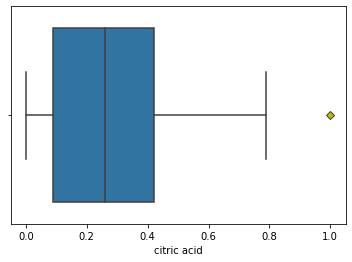

In [ ]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["citric acid"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["citric acid"], 0.75))
iqrI =(np.quantile(wine["citric acid"], 0.25))
m=wine["citric acid"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">  
Se nos presenta en este caso también un único valor atipico, que se encuentra lejos de nuestra media. 
 <hr>
Procedemos a eliminar este valor atípico para que no afecte nuestro análisis posterior.
</div>

In [ ]:
ma=wine["citric acid"].max()
print ("Valor atípico a eliminarse:", ma)

#Eliminamos de nuestro conjunto de datos
wine = wine.drop(wine[wine['citric acid']==ma].index)

Valor atípico a eliminarse: 1.0


Cuartil inferior: 1.9  Cuartil superior: 2.6  Media: 2.5385410144020057


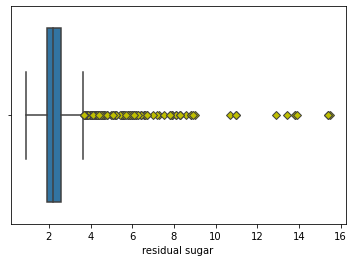

In [ ]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["residual sugar"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["residual sugar"], 0.75))
iqrI =(np.quantile(wine["residual sugar"], 0.25))
m=wine["residual sugar"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">  
Al igual que en la variable acidez total, se presenta una gran cantidad de valores atípicos, en este caso la cantidad de azucar residual en el vino entre los valores de 4 a 16 son normales, por lo que no es necesario tratarlos, pues estos valores ayudarán a identificar la calidad del vino en los analisis posteriores.
</div>

Cuartil inferior: 0.07  Cuartil superior: 0.09  Media: 0.08710832811521577


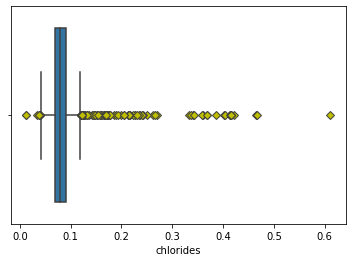

In [ ]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["chlorides"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["chlorides"], 0.75))
iqrI =(np.quantile(wine["chlorides"], 0.25))
m=wine["chlorides"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">  
Para este caso, tenemos al igual que en la mayoria de las variables muchos valores atípicos de acuerdo al gráfico de caja, sin embargo, existe un solo valor extremo que se aleja demasiado de la media. Así que aplicaremos el mismo tratamiendo que en los otros casos, eliminandolo de nuestro conjunto.
</div>

In [ ]:
ma=wine["chlorides"].max()
print ("chlorides:", ma)

#Eliminamos de nuestro conjunto de datos
wine = wine.drop(wine[wine['chlorides']==ma].index)

chlorides: 0.611


Cuartil inferior: 7.0  Cuartil superior: 21.0  Media: 15.8765664160401


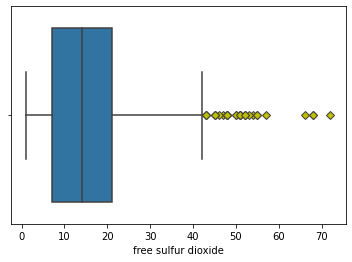

In [ ]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["free sulfur dioxide"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["free sulfur dioxide"], 0.75))
iqrI =(np.quantile(wine["free sulfur dioxide"], 0.25))
m=wine["free sulfur dioxide"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Para la variable 'free sulfur dioxide', se observa en especial 3 valores atípicos que se encuentan lejos de la media. Sin embargo, investigando en (https://www.infoagro.com/instrumentos_medida/doc_sulfuroso_vino.asp?k=1), muestra una tabla donde los valores de 40 y 70 de SULFUROSO no son valores anormales en un vino, por lo que en este caso no aplicaremos ningún tratamiento.
</div>

Cuartil inferior: 22.0  Cuartil superior: 62.0  Media: 46.478070175438596


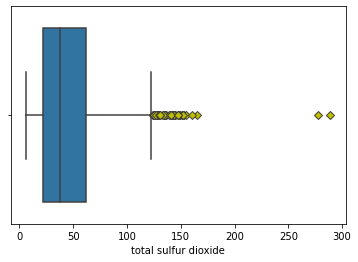

In [ ]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["total sulfur dioxide"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["total sulfur dioxide"], 0.75))
iqrI =(np.quantile(wine["total sulfur dioxide"], 0.25))
m=wine["total sulfur dioxide"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
En esta variable, tenemos dos valores que se encuentran demasiado alejados de la media, por lo que sí podrían causar ruído en nuestro analsis. 
<hr>
    
Eliminaremos estos dos valores de nuestro conjunto de datos.
</div>

In [ ]:
ma=wine["total sulfur dioxide"].max() 
print ("Valor atípico a eliminarse 1:", ma)

#Eliminamos de nuestro conjunto de datos el primer extremo
wine = wine.drop(wine[wine['total sulfur dioxide']==ma].index)

#Ahora el segundo
ma1=wine["total sulfur dioxide"].max() 
print ("Valor atípico a eliminarse 2:", ma1)
wine = wine.drop(wine[wine['total sulfur dioxide']==ma1].index)

Valor atípico a eliminarse 1: 289.0
Valor atípico a eliminarse 2: 278.0


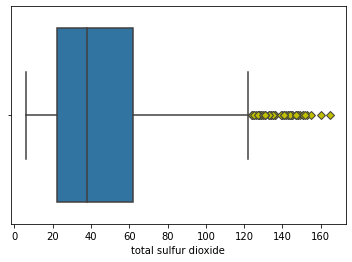

In [ ]:
#Graficamos nuevamente, con los extremos eliminados
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["total sulfur dioxide"],flierprops=green_diamond)


Cuartil inferior: 3.21  Cuartil superior: 3.4  Media: 3.3118883312421583


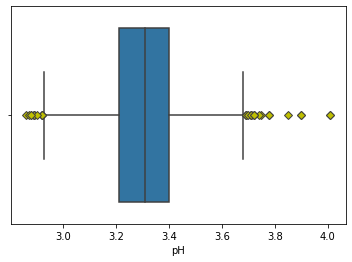

In [ ]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["pH"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["pH"], 0.75))
iqrI =(np.quantile(wine["pH"], 0.25))
m=wine["pH"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Aquí no tenemos valores muy alejados de la media, por lo que todos serán considerados para nuestro análisis posterior.
</div>

Cuartil inferior: 0.55  Cuartil superior: 0.73  Media: 0.6572772898368888


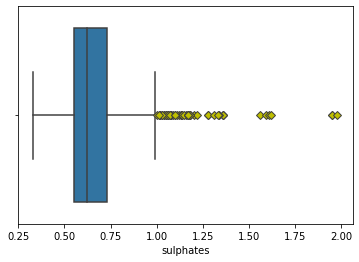

In [ ]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["sulphates"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["sulphates"], 0.75))
iqrI =(np.quantile(wine["sulphates"], 0.25))
m=wine["sulphates"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Para este caso, también contamos dos valores que se encuentran lejos de la media. Estos valores podrían afectar causar ruído a nuestro análisis.  

Los demás valores que se muestran como extremos en nuestra digrama de caja, son masivos por lo que serán considerados para nuestro analisis. 

<hr>
    
Trataremos únicamente los dos últimos valores extremos como en los casos anteriores eliminando de nuestro conjunto de datos.

</div>

In [ ]:
ma=wine["sulphates"].max() 
print ("Valor atípico a eliminarse 1:", ma)

#Eliminamos de nuestro conjunto de datos el primer extremo
wine = wine.drop(wine[wine['total sulfur dioxide']==ma].index)

Valor atípico a eliminarse 1: 1.98


In [ ]:
#Ahora el segundo
ma1=wine["sulphates"].max()
print ("Valor atípico a eliminarse 2:", ma1)
#wine = wine.drop(wine[wine['sulphates']==ma1].index)

Valor atípico a eliminarse 2: 1.98


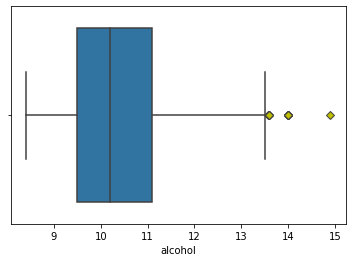

In [ ]:
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["alcohol"],flierprops=green_diamond)

<div style="background-color: #F4F6F6;">
Finalmente, con la variable 'Alcohol', si bien existen tres valores fuera del rango, estos no se encuentran tan alejados de la media. Considerando que niveles altos de alcohol en un vino no son valores incorrectos, no daremos ningún tratamiento a esta variable.

</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Convertir nuestra variable target a categórica</strong> 
</div>

## <div style="background-color: #F4F6F6;">
Para nuestro caso es la variable "quality" que contiene la puntuación entre 0 y 10 de la calidad del vino. 

Esto nos ayudará en análisis gráficos y predicciones futuras. 
</div>

In [ ]:
# LO COMENTO DE MOMENTO PORQUE PARA LA MATRIZ DE CORRELACIÓN ME VIENE BIEN QUE SEA NUMÉRICA

#primero convertirla a entera
#wine['quality']=wine.quality.astype('int')

#convirtiendo a variable categorica
#wine['quality']= wine['quality'].astype('category')
#wine['quality'].head()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Resumen de la limpieza de datos</strong> 
</div>

<div style="background-color: #F4F6F6;">
Hemos realizado inicialmente una descripción general de los datos, luego una descripción estadística para avanzar hacia la limpieza, como primer punto se tiene una búsqueda de valores vacios, que no han sido encontrados en nuestro conjunto de datos. Como segundo punto se trabajó con los valores extremos, se estableció un umbral donde, se identificaban los valores (mediante diagramas de caja), que para nuestro dataset eran incorrectos o totalmente fuera de los rango normales y de la media de los demás datos, así, una vez identificados estos valores que en la mayoria de las variables era los valores más extremos, se procedio a eliminarlos. De esta manera se descartaron valores que pudieran afectar negativamente nuestro modelo posterior.

Para el caso de los valores extremos también se tienen otras técnicas que nos permiten tratar estos valores como:
    
    - Reemplazar estos valores por la media
    - Imputación de los valores mediante métodos estadísticos.
   
 
 Como último punto se realizó una conversión de variables que nos será útil para el analisis de los siguientes puntos.
</div>

[texto del enlace](https://)# 4. Análisis gráfico.

<hr>
<div style="background-color: #F4F6F6;">
Una vez tenemos ya limpios nuestros datos, como siguiente paso realizaremos algunas gráficas que nos permitiran ver la relación entre las diferentes variables de nuestro conjunto de datos con la variable ojetivo, de esta manera podrémos identificar las variables más fuertes y débiles para nuestro analísis. 
    
Para esta exploración gráfica utilizaremos histogramas y diagramas de correlación.
    
</div>

<div style="background-color: #F4F6F6;">
Comenzaremos analizando nuestra variable objetivo de manera individual, obtenemos la frecuencia y realizamos un gráfico para ver como estan distribuidos los datos de acuerdo a la calidad del vino.
</div>

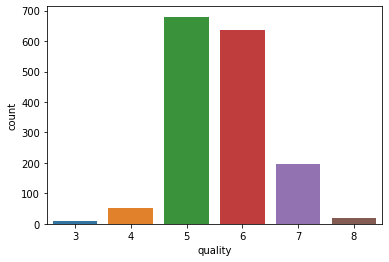

In [ ]:
# tabla de frecuencia de clases de vinos
ax = sns.countplot(x='quality', data=wine)

<div style="background-color: #F4F6F6;">
<strong>Graficamos</strong>

En la gráfica anterior podemos observar que los datos del vino son simples y que la muestra se centra en las calidades 5, 6 y 7.

Para ver mejor la distribución podemos utilizar la siguente gráfica:
</div>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


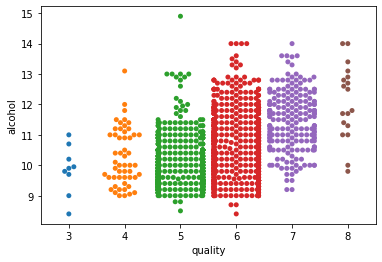

In [ ]:
ax = sns.swarmplot(x="quality",y="alcohol",data=wine)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


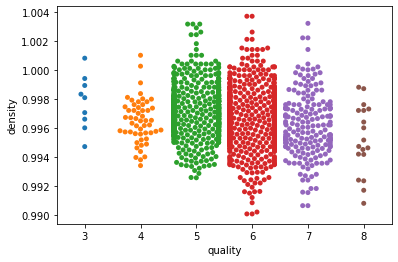

In [ ]:
ax = sns.swarmplot(x="quality",y="density",data=wine)

<div style="background-color: #F4F6F6;">
Podemos observar que los datos tienen una mayor concentración en calidad de vino 5 y 6, luego le sigue el tipo 7. En el caso de la calidad de vino 4,8 y 3 presentan la menor cantidad de datos.
</div>

<div style="background-color: #F4F6F6;">
<strong>Variables numéricas:</strong> Graficamos los histogramas de algunas de nuestras variables.
    
</div>

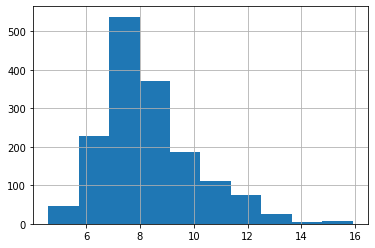

In [ ]:
wine['fixed acidity'].hist() #Variable fixed acidity

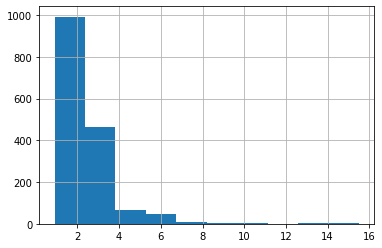

In [ ]:
wine['residual sugar'].hist() #Variable residual sugar

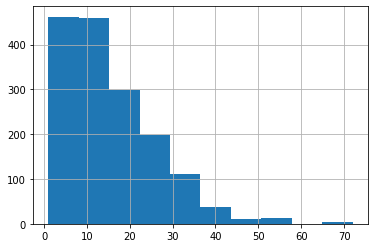

In [ ]:
wine['free sulfur dioxide'].hist() #Variable free sulfur dioxide

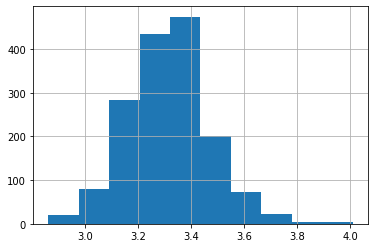

In [ ]:
wine['pH'].hist() #Variable pH

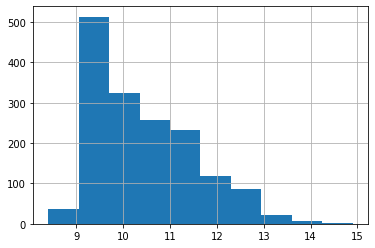

In [ ]:
wine['alcohol'].hist() #Variable alcohol

<div style="background-color: #F4F6F6;">
    Analizando las gráficas se tiene que:
    
    -En el caso de la variable fixed acidity, tiene una distribución casi normal con cola hacia la derecha, la mayor concentración de los datos esta entre 6 y 10.
    
    -Para la variable residual sugar, los datos estan concentrados practicamenente a la izquierda con valores entre 1 y 4, esta variable también tiene una cola hacia la derecha.
    
    -Para la variable free sulfur dioxide, su distribución de datos se concentra en los valores entre 0 y 30, al igual que en los otros casos presenta cola hacia la derecha.
    
    -La variable pH mantiene una distribución normal y en el caso de la variable alcohol, presenta una mayor concentración de los datos en los valores entre 9 y 13.
</div>

<div style="background-color: #F4F6F6;">
<strong>Correlación entre las variables</strong> 
</div>

In [ ]:
#tomamos las variables a ser analizadas, consideraremos a todas
wineD= wine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
'total sulfur dioxide','density','pH','sulphates','alcohol']]

#calculamos la matriz de correlacion
correlation_matrix = wine.corr()
correlation_matrix


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.258287,0.678129,0.116902,0.100948,-0.154736,-0.115435,0.669096,-0.688094,0.185323,-0.061101,0.125036
volatile acidity,-0.258287,1.000000,-0.554948,0.009579,0.067240,-0.003720,0.096488,0.023284,0.231178,-0.264857,-0.204535,-0.383360
citric acid,0.678129,-0.554948,1.000000,0.134684,0.179510,-0.070726,0.014654,0.370295,-0.533921,0.299981,0.110780,0.228822
residual sugar,0.116902,0.009579,0.134684,1.000000,0.065173,0.178034,0.173270,0.369428,-0.075952,0.008101,0.033648,0.005070
chlorides,0.100948,0.067240,0.179510,0.065173,1.000000,0.003064,0.057189,0.206181,-0.253161,0.325629,-0.225222,-0.115612
free sulfur dioxide,-0.154736,-0.003720,-0.070726,0.178034,0.003064,1.000000,0.672794,-0.019294,0.079988,0.048351,-0.073684,-0.056154
total sulfur dioxide,-0.115435,0.096488,0.014654,0.173270,0.057189,0.672794,1.000000,0.090361,-0.048455,0.049257,-0.229132,-0.210220
density,0.669096,0.023284,0.370295,0.369428,0.206181,-0.019294,0.090361,1.000000,-0.345925,0.141903,-0.493684,-0.172841
pH,-0.688094,0.231178,-0.533921,-0.075952,-0.253161,0.079988,-0.048455,-0.345925,1.000000,-0.181623,0.208601,-0.057446
sulphates,0.185323,-0.264857,0.299981,0.008101,0.325629,0.048351,0.049257,0.141903,-0.181623,1.000000,0.105749,0.270458


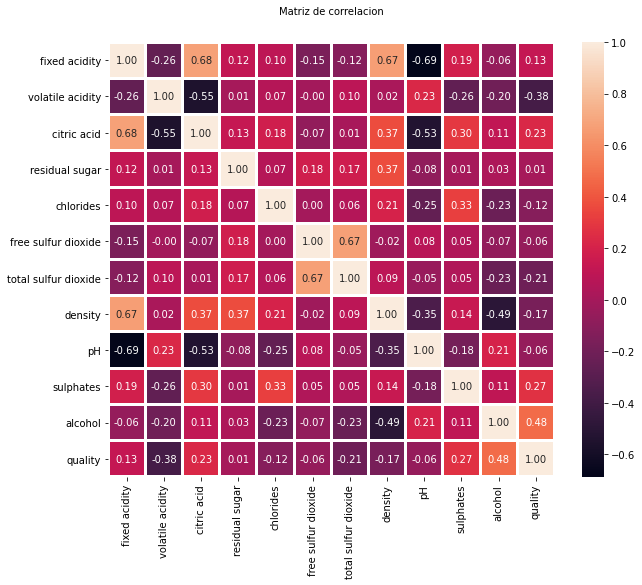

In [ ]:
#Graficando
plt.figure(figsize=(10,8))
plt.title('Matriz de correlacion', y=1.05, size=10)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=2)


De la matriz de correlación se pueden observar las siguientes relaciones:

1.   La variable alcohol está correlacionada con la calidad del vino
2.   La variable alcohol está relacionada de manera debil con la variable pH
3.   Citric acid y density tienen una correlación fuerte con fixed acidity
4.   pH tiene una relación negativa con densidad, fixed acidity, citric acid y sulfates




<div style="background-color: #F4F6F6;">
<strong>Representación gráfica de las relaciones entre algunas variables</strong> 
    <hr>
Lo haremos mediante la función "pairplot" de la librería 'seaborn' con el parámetro "hue".
</div>

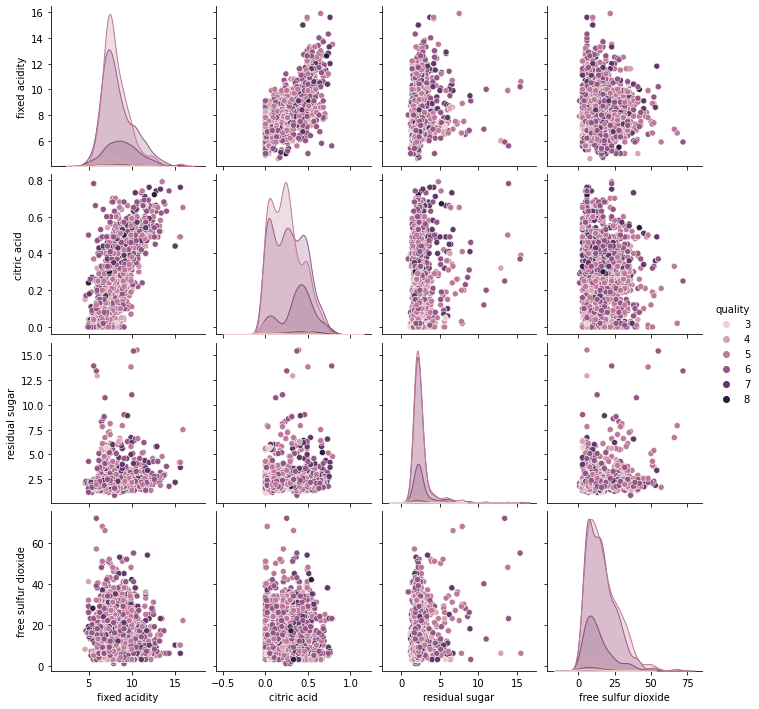

In [ ]:
sns.pairplot(data=wine[['fixed acidity','citric acid','residual sugar','free sulfur dioxide','quality']],
            hue='quality', dropna=True)
    
plt.show()

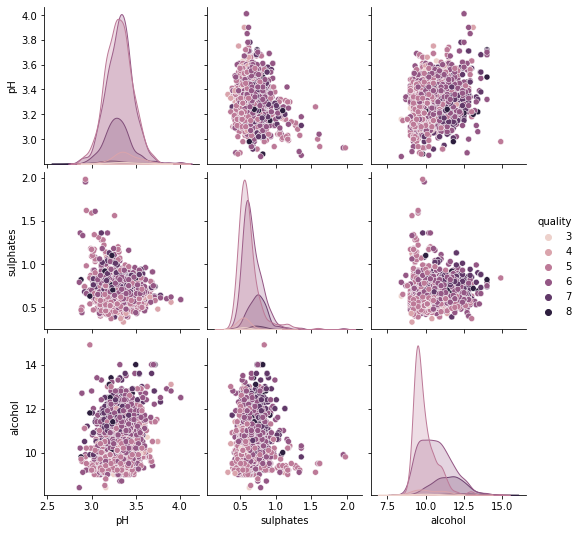

In [ ]:
sns.pairplot(data=wine[['pH','sulphates','alcohol','quality']],
            hue='quality', dropna=True)
    
plt.show()

A continuación, se analizarán más en detalle las relaciones entre algunas variables:

**Alcohol VS Quality**

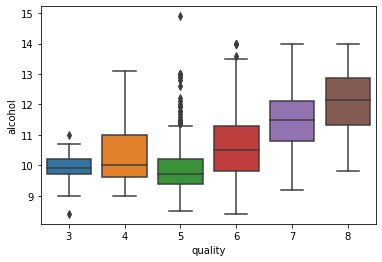

In [ ]:
ax = sns.boxplot(x='quality', y='alcohol', data = wine)

En la gráfica anterior se ven algunos puntos fuera de la gráfica, que son los outliers que vimos anteriormente, podemos eliminarlos de la gráfica con un parámetro para que se vea más claro:

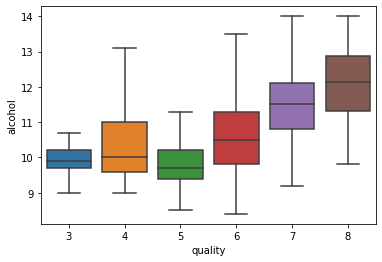

In [ ]:
ax = sns.boxplot(x='quality', y='alcohol', data = wine, showfliers=False)

Ahora podemos ver que cuanto más concentración de alcohol hay mayor es la calidad del vino

**Alcohol vs pH**

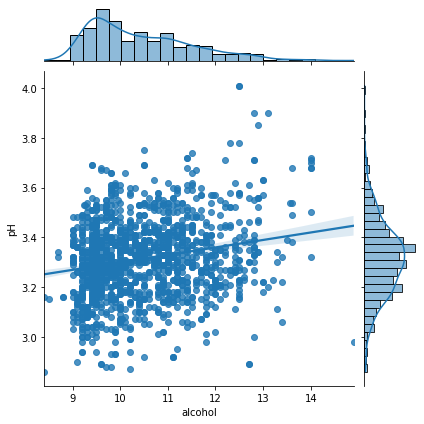

In [ ]:
ax = sns.jointplot(x='alcohol',y='pH',data=wine, kind='reg')

En la gráfica anterior podemos ver que la relación entre ph y alcohol están relacionados de manera muy frágil. En la gráfica aparece una línea de regresión que describe la correlación entre ellos

Analisis de las gráficas ...

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exportación de los datos preprocesados</strong> 
</div>

<div style="background-color: #F4F6F6;">
Primero, cargamos nuestro set de datos preprocesado y observamos sus primeras 10 filas.
</div>

In [ ]:
dataWine = pd.read_csv("winequality-red-clean.csv")
dataWine.head(10)

FileNotFoundError: ignored

In [ ]:
wine.to_csv("winequality-red-clean.csv")

# 5. Comprobación normalidad y homogeneidad de la varianza

A continuación, vamos a comprobar la normalidad y la homogeneidad de la varianza.

Para comprobar si una variable sigue una distribución normal, hay que ver si se obtiene un p-valor superior al nivel de significación prefijado, en este caso 0,05. Si estos valores superan el nivel podemos decir que esa variable sigue una distribución normal.

In [ ]:
from scipy.stats import anderson
for col in wine.columns.to_list():
  print(col)
  print(anderson(wine[col]))
  

fixed acidity
AndersonResult(statistic=27.987699123360017, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
volatile acidity
AndersonResult(statistic=5.296091298816236, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
citric acid
AndersonResult(statistic=17.767721218234556, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
residual sugar
AndersonResult(statistic=186.05323419349043, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
chlorides
AndersonResult(statistic=192.4498019965299, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
free sulfur dioxide
AndersonResult(statistic=38.28913405187859, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.08

En los resultados para cada una de las variables podemos observar el valor estadístico, por ejemplo para citric acid es 17.767. Comparando este valor con acada valor crítico para cada nivel de significancia podemos ver si los resultados son significativos, por ejemplo:
- El valor crítico para a = 0.01 es 1,089. Como  el valor estadístico es mayor (17.767) los resultados son significativos al nivel de significancia 0.01
- El valor crítico para a = 0.025 es 0,916. Como  el valor estadístico es mayor (17.767) los resultados son significativos al nivel de significancia 0.025
- Etc

Podemos ver que los resultados del test son significativos para cada nivel de significancia, lo que significa que rechazaríamos la hipótesis nula de la prueba sin importar qué nivel de significancia elijamos usar.

Por lo tanto, tenemos suficientes evidencias para decir que lso datos de la muestras no se distribuyen normalmente

A continuación, estudiaremos la homogeneidad de varianzas mediante la aplicaciónde un test de Fligner-Killeen. 

In [ ]:
from scipy.stats import fligner

columns = wine.columns.to_list()
count = 0

for col in columns:
  for col2 in columns:
    if col is not col2:
      #print ("Analizando test de figner entre: " + col + " y " + col2)
      stats, p = fligner(wine['quality'], wine['density'])
      if p > 0.05:
        count = count +1
        print ("Analizando test de figner entre: " + col + " y " + col2)
        print ("Aceptamos la hipótesis ya que el p-valor es mayor que 0.05 - " + p)
if count == 0:
  print ("ninguna de las varianzas entre variables son homogéneas")

ninguna de las varianzas entre variables son homogéneas


Como podemos ver en el resultado del código anterior, ninguna combinación de variables muestra una varianza homogénea

# 6. Aplicacion de pruebas estadísticas

El objetivo de las siguientes pruebas es ver si las variables alcohol y volatile acidity son buenas predictoras del modelo y por tanto clasifican bien las muestras para obtener la calidad final del vino

Vamos a separar los datos en dos conjuntos, uno de test y otro de entrenamiento:

In [ ]:
from sklearn.model_selection import train_test_split

wine_train,wine_test=train_test_split(wine,train_size=0.7,test_size=0.3,random_state=100)

A continuación vamos a reescalar los datos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

wine_train[:]=scaler.fit_transform(wine_train[:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Separamos la variable objetivo del resto de ariables

In [ ]:
wine_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,0.333155,0.339417,0.340932,0.093474,0.165074,0.222080,0.251555,0.470406,0.392303,0.182347,0.359545,0.528610
std,0.161232,0.145322,0.244426,0.098183,0.100119,0.153976,0.200810,0.145966,0.134830,0.103447,0.190362,0.161671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.220183,0.231405,0.126582,0.048951,0.127473,0.089552,0.100629,0.380077,0.295652,0.113924,0.196429,0.400000
50%,0.293578,0.330579,0.316456,0.069930,0.147253,0.194030,0.194969,0.468199,0.391304,0.158228,0.303571,0.600000
75%,0.422018,0.425620,0.531646,0.097902,0.170330,0.305970,0.345912,0.556322,0.469565,0.227848,0.482143,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train=wine_train.pop('quality')
X_train=wine_train

Vamos a aplicar una regresión lineal

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,9)             
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fixed acidity', True, 1),
 ('volatile acidity', True, 1),
 ('citric acid', False, 3),
 ('residual sugar', True, 1),
 ('chlorides', True, 1),
 ('free sulfur dioxide', False, 2),
 ('total sulfur dioxide', True, 1),
 ('density', True, 1),
 ('pH', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['citric acid', 'free sulfur dioxide'], dtype='object')

In [ ]:
X_train_rfe = X_train[col]

A continuación, se va a construir un modelo lineal

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Features,VIF
5,density,73.29
0,fixed acidity,34.30
6,pH,21.89
8,alcohol,12.11
1,volatile acidity,7.66
7,sulphates,5.69
3,chlorides,4.70
2,residual sugar,3.22
4,total sulfur dioxide,2.72


In [ ]:
import statsmodels.api as sm

X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params

const                   0.523787
fixed acidity           0.089487
volatile acidity       -0.267344
residual sugar          0.123520
chlorides              -0.147736
total sulfur dioxide   -0.090514
density                -0.105367
pH                     -0.031311
sulphates               0.317873
alcohol                 0.292724
dtype: float64

In [ ]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     80.21
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          3.15e-114
Time:                        15:59:08   Log-Likelihood:                 730.41
No. Observations:                1115   AIC:                            -1441.
Df Residuals:                    1105   BIC:                            -1391.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5238 

Vamos a quedarnos solo con las variables que tenían mayor correlación:

In [ ]:
X_train_new = X_train_rfe.drop(["fixed acidity", "residual sugar", "chlorides", "total sulfur dioxide", "density", "pH", "sulphates"], axis = 1)


vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,volatile acidity,2.51
1,alcohol,2.51


In [ ]:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.params

const               0.521155
volatile acidity   -0.364983
alcohol             0.365285
dtype: float64

In [ ]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     299.2
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          1.07e-104
Time:                        15:59:14   Log-Likelihood:                 690.17
No. Observations:                1115   AIC:                            -1374.
Df Residuals:                    1112   BIC:                            -1359.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5212      0.014  

**Interpretación del modelo**

*Hypothesis Testing*

El test de hipótesis dice que: 

H0:B1=B2=...=Bn=0 H1: al menos un Bi!=0

Valores de coeficiente del modelo lr2

- const 0.5212
- volatile acidity -0.3650
- alcohol 0.3653

*F Stadistics*

F-Stadistics se usa para probar la significancia global del modelo, a mayor f-Stadistics, mayor significancia del modelo.

- F-statistic:                     299.2
- Prob (F-statistic):          1.07e-104

El valor de F.stadistics (299.2) que es mayor que 1 y que  p-valor de '~0.0000' significa que el modelo es significativo.

*La ecuación del best fitted surface basada en el modelo lr2*

quality = 0.5212 - (volatile acidity * 0.3650) + (alcohol * 0.3652)

*Interpretación de los coeficientes*

- Volatile acidity: El coeficiente de 0.3650 indica que cada unidad disminuida en la variable volatile acidity, aumenta la variable quality en 0.3650 unidades

- Alcohol: El coeficiente de 0.3653, indica que el incremento en la variable alcohol aumenta la variable quality en 0.3652 unidades

Vamos a probar con el algoritmo RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score

X=wine.drop(['quality'], axis=1)# Features
y=wine['quality']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
rfc.fit(X_train,y_train)

#Perform prediction on the test set
y_pred=rfc.predict(X_test)

print("Classification Report:",classification_report(y_test, y_pred))
print("Confusion Metrics :",confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred, average='micro'))
print('Precision Score:', precision_score(y_test, y_pred, average="micro"))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           4       0.00      0.00      0.00        19
           5       0.78      0.77      0.78       211
           6       0.63      0.76      0.69       189
           7       0.65      0.53      0.58        53
           8       1.00      0.14      0.25         7

    accuracy                           0.70       479
   macro avg       0.61      0.44      0.46       479
weighted avg       0.68      0.70      0.68       479

Confusion Metrics : [[  0   7  11   1   0]
 [  0 162  46   3   0]
 [  0  37 144   8   0]
 [  0   1  24  28   0]
 [  0   0   3   3   1]]
F1 Score:  0.6993736951983298
Precision Score: 0.6993736951983298
Accuracy:  0.6993736951983298


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Podemos ver una precisión del 68.8% lo cual no es muy buena, aunque esta métrica no es la mejor para clasificación multiclase porque la clasificación no está balanceada, la mejor métrica en este caso sería recall o mejor aun, el f-score.

También podemos ver las variables más importantes:


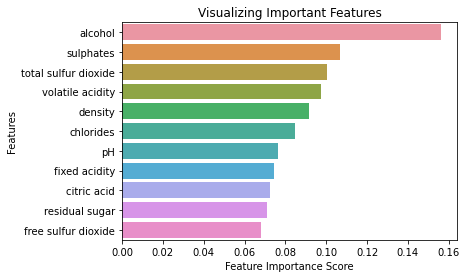

In [ ]:
importance = rfc.feature_importances_
feature_imp = pd.Series(importance, index=X.columns).sort_values(ascending=False)
feature_imp

# Visualize the Importance Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

Por último vamos a probar, como hemos visto anteriormente si hay alguna asociacion entre alcohol y volatile acidity, para comprobar si el estudio anterior es correcto o nos hemos confundido al elegir las variables que describen la regresión:



Para ello vamos a utilizar el "paired sampled t-test" también llamado, "dependent sample t-test". Es un test univariable que comprueba si existe una diferencia significante entre dos variables dadas.

H0: Significa que la diferencia entre las dos variables es 0
H1: Significa que la diferencia entre las dos variables no es 0

In [ ]:
from scipy import stats

ttest, pval = stats.ttest_rel(X_train['alcohol'], X_train['volatile acidity'])

print("p-value", pval)

if pval <0.05:
  print("rechazamos la hipótesis nula")
else:
  print("aceptamos la hipótesis nula")

p-value 0.0
rechazamos la hipótesis nula


# 7. Concluisones

Con las pautas anteriores se puede comprobar la relación entre todas las variables, en nuestro estudio queríamos comprobar la relación entre las variables alcohol y volatile acidity y la calidad final del vino.

A lo largo de la práctica hemos aprendido a realizar una limpieza del dataset, para prepararlo correctamente y que sea útil para poder extraer toda la información requerida para el ejercicio que queramos hacer.

En este caso hemos visto que la variable volatile acidity no tiene suficiente importancia como para ayudar a predecir el modelo, más bien se debería elegir la variable densidad, que se ha visto a lo largo del estudio que está más relacionada.

Preparar los datos, para que un compañero pueda explotarlos posteriormente, con la confianza de que el dataset con el que va a trabajar está listo y sin ningún fallo, acelera el proceso de investigación y explotación de los juegos de datos, por lo que es muy importante realizar un buen análisis exploratorio de los datos y dejar el dataset normalizado, en la medida de lo posible.